The task is to explore sentiment analysis pipeline in Transformers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from transformers import pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
# load the pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
# test out on some sentences
classifier("This is an amazing course")

[{'label': 'POSITIVE', 'score': 0.999884843826294}]

In [4]:
classifier("This is a stupid video")

[{'label': 'NEGATIVE', 'score': 0.9997859597206116}]

In [5]:
classifier("I am not sure I liked this restaurant")

[{'label': 'NEGATIVE', 'score': 0.9983975291252136}]

In [6]:
classifier("This place is actually not so terrible")

[{'label': 'POSITIVE', 'score': 0.993089497089386}]

In [22]:
# download the dataset: airline tweets
# original dataset on Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [8]:
# save the dataset in Pandas dataframe
df = pd.read_csv('AirlineTweets.csv')

In [9]:
# keep only texts and sentiments
df = df[['text', 'airline_sentiment']]

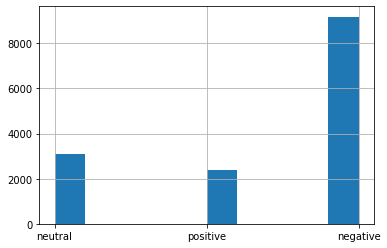

In [10]:
# check the sentiment distribution: it looks imbalanced
df['airline_sentiment'].hist()

In [11]:
# keep only positive and negative sentiments
df = df[df['airline_sentiment'] != 'neutral'].copy()

In [12]:
# assign integers to classes
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)

In [13]:
# make predictions
texts = df['text'].tolist()
predictions = classifier(texts)

In [14]:
# calculate probabilities
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions]

In [15]:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]

In [16]:
preds = np.array(preds)

In [17]:
# calculate accuracy
print("Accuracy:", np.mean(df['target'] == preds))

Accuracy: 0.8898708950697514


In [18]:
# make a confusion matrix
cm = confusion_matrix(df['target'], preds, normalize='true')
cm

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

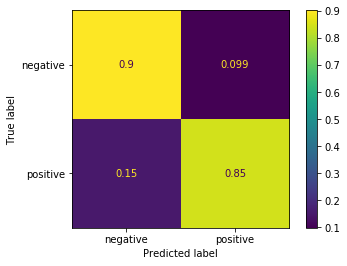

In [19]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive'])
cm_plot.plot()

In [20]:
# calculate F1 score and AUC
f1_score(df['target'], preds)

0.7587777566900741

In [21]:
roc_auc_score(df['target'], probs)

0.948593515174145